In [2]:
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size' : 10,
    'pgf.rcfonts': False,
})

In [4]:
X = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(X, X)
def pi_ideal(x):
    return np.power(x,2)/2
def pi_cnga(x):
    return (1.003)*np.power(x, 2)/2 + (2.968e-2) *np.power(x,3)/3

zz = np.abs(np.divide(pi_ideal(xx), pi_ideal(yy)) - np.divide(pi_cnga(xx), pi_cnga(yy)) )

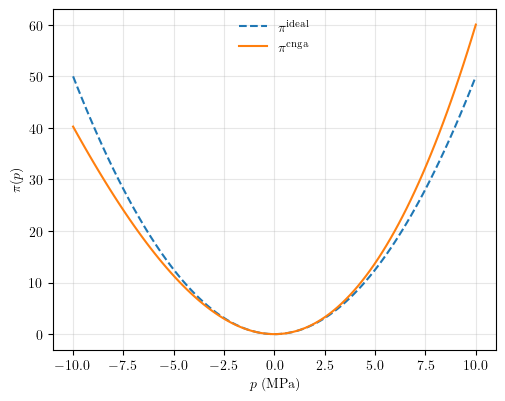

In [5]:
fig, ax = plt.subplots()
line1, = ax.plot(X, pi_ideal(X), '--', label=r'$\pi^{\mathrm{ideal}}$')
line2, = ax.plot(X, pi_cnga(X), label=r'$ \pi^{\mathrm{cnga}}$')
ax.set_xlabel(r'$p\; (\mathrm{MPa})$')
ax.set_ylabel(r'$\pi(p)$')
ax.legend(handles=[line1, line2], frameon=False,loc='upper center')
plt.grid(alpha=0.3)
fig.tight_layout()
fig.set_size_inches(5, 4)
# plt.savefig('potential.pdf')

/var/folders/jg/pzwz425x52b063t4wxyzfkym0000gp/T/ipykernel_49842/2552468598.py:2: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, zz, locator=ticker.LogLocator())


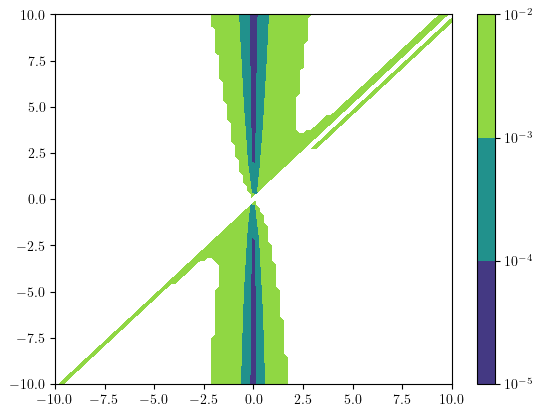

In [6]:
zz = np.ma.array(zz, mask=zz > 0.01)
plt.contourf(xx, yy, zz, locator=ticker.LogLocator())
plt.colorbar()

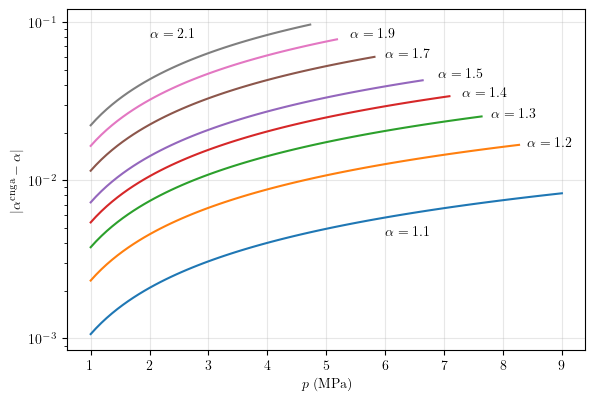

In [7]:
import math
P = np.linspace(1, 10, 100)
fig, ax = plt.subplots()

loc = {1.10: (6, 0.0045), 1.20: (8.4, 0.0165), 1.30: (7.8, 0.025),
      1.40: (7.3, 0.034), 1.50: (6.9, 0.045), 1.70: (6, 0.06),
      1.90: (5.4, 0.08), 2.1: (2, 0.08)}

for r in [1.10, 1.20, 1.30, 1.40,  1.50,  1.70,  1.9, 2.1]:
    a1 =[]
    a2 =[]
    err =[]
    P_arr =[]
    for p in P:
        if r*p > 10:
            continue
        P_arr.append(p)
        rnew = math.sqrt( pi_cnga(r*p) / pi_cnga(p) )
        err.append(abs(rnew-r))
        a1.append(r)
        a2.append(rnew)
    ax.semilogy(P_arr, err, label= r'$\alpha ={}$'.format(r))
    # ax.legend(loc=loc.get(r, (0.1, 0.1)), frameon=False)
    if r in loc:
        x, y = loc[r]
        ax.text(x, y, r'$\alpha ={}$'.format(r)) 
ax.set_ylabel(r'$\left|\alpha^{\mathrm{cnga}} - \alpha\right|$')
ax.set_xlabel(r'$p\; (\mathrm{MPa})$')
plt.grid(alpha=0.3)
fig.tight_layout()
fig.set_size_inches(6, 4)
# plt.savefig('c_ratio.pdf')

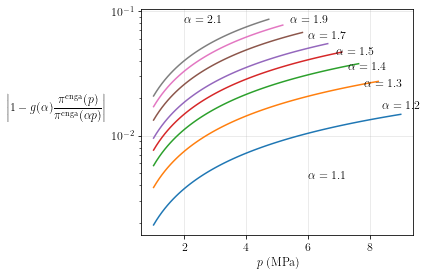

In [31]:
X = np.linspace(4.5, 8.5, 100)
Y = np.linspace(1, 2.0, 100)
xx, yy = np.meshgrid(X, Y)
c0 =0
c1 = 0
c2 = 1
c3 = 0
def rel_err(x, alpha):
    return ( pi_cnga(alpha * x) - (c0 + c1 * alpha + c2 * (alpha**2) + c3 * (alpha**3) ) * pi_cnga(x) )/ pi_cnga(alpha * x)

# zz = rel_err(xx, yy)
# plt.contourf(xx, yy, zz, locator=ticker.LogLocator())
# plt.colorbar()

import math
P = np.linspace(1, 10, 100)
fig, ax = plt.subplots()

loc = {1.10: (6, 0.0045), 1.20: (8.4, 0.0165), 1.30: (7.8, 0.025),
      1.40: (7.3, 0.034), 1.50: (6.9, 0.045), 1.70: (6, 0.06),
      1.90: (5.4, 0.08), 2.1: (2, 0.08)}

for r in [1.10, 1.20, 1.30, 1.40,  1.50,  1.70,  1.9, 2.1]:
    err =[]
    P_arr =[]
    for p in P:
        if r*p > 10:
            continue
        P_arr.append(p)
        err.append(abs(rel_err(p, r)))
    ax.semilogy(P_arr, err, label= r'$\alpha ={}$'.format(r))
    # ax.legend(loc=loc.get(r, (0.1, 0.1)), frameon=False)
    if r in loc:
        x, y = loc[r]
        ax.text(x, y, r'$\alpha ={}$'.format(r)) 
ax.set_ylabel(r'$\left| 1 - g(\alpha) \displaystyle\frac{\pi^{\mathrm{cnga}}(p)}{\pi^{\mathrm{cnga}}(\alpha p)}\right|$', rotation='horizontal', ha='right')
ax.set_xlabel(r'$p\; (\mathrm{MPa})$')
plt.grid(alpha=0.3)
fig.tight_layout()
fig.set_size_inches(6, 4)
# plt.savefig('c_ratio.pdf')